In this dataset we have to identify fraudulent transaction and it is basically a anomaly detection problem.

Anomaly detection is a technique used to identify unusual patterns that do not conform to expected behavior, called outliers. It has many applications in business, from intrusion detection (identifying strange patterns in network traffic that could signal a hack) to system health monitoring (spotting a malignant tumor in an MRI scan), and from fraud detection in credit card transactions to fault detection in operating environments.

This dataset is suffered from the problem of imbalanced dataset as number of fraudulent transactions are very few in comparison of non fraudulent transactions this is the reason that most of the machine learning and deep learning models will not provide satisfactory results and/or unable to identify fraudulent transasctions.

Observation from the dataset :

The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.
The ‘Time’ and ‘Amount’ features are not transformed data. 3.There is no missing value in the dataset.
So, my approach/workflow for solving this problem is detailed below :

EDA
Finding correlation of attributes with target variable
Preprocessing the data
Apply Deep Neural Network
Apply Machine Learning Classifiers (Random forest, Decision Tree Classifier)
Apply Undersampling
Apply Deep Neural network to check the accuracy and false negatives.
Apply SMOTE - Oversampling
Apply Deep Neural network to check the accuracy and false negatives.
Final remarks
Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import keras
np.random.seed(2)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
#print(os.listdir("../input"))
# in T: conda install -c glemaitre imbalanced-learn or
# in Jupyter: !pip3 install imblearn

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'/Users/irinamahmudjanova/Documents/Documents - Irina’s MacBook Pro/STUDY/DATA_SCIENCE/DS_ 2019_DL_Tokio/CREDIT_FRAUD'

In [6]:
#os.chdir('/Users/irinamahmudjanova/Documents/Documents - Irina’s MacBook Pro/STUDY/DATA_SCIENCE/DS_ 2019_DL_Tokio/CREDIT_FRAUD')

In [3]:
# Function to plot Confusion Matrix (to be used later).
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [69]:
data=pd.read_csv('creditcard.csv')
#Exploratory Data Analysis (EDA)
#Checking the actual data how it looks like by looking at top 5 rows of the dataset.
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [70]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


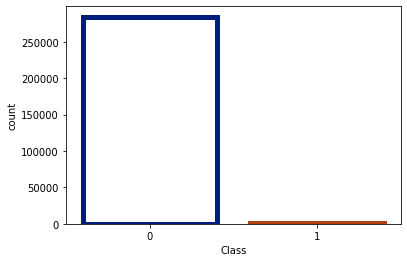

In [71]:
# To check the count of fraudulent and normal transactions
sns.countplot(data['Class'],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3), label = "Count")

#It seems that there are very few Fraudulent Transactions in comparison to Normal Transactions.

In [72]:
# Now Checking actual number of fraudulent transactions
fraud_indices=np.array(data[data.Class==1].index)
no_records_fraud=len(fraud_indices)
normal_indices=np.array(data[data.Class==0].index)
no_records_normal=len(normal_indices)

print("Sum of Fraudulent Transaction is {} and Sum of Normal Transaction is {}".format(no_records_fraud, no_records_normal))

Sum of Fraudulent Transaction is 492 and Sum of Normal Transaction is 284315


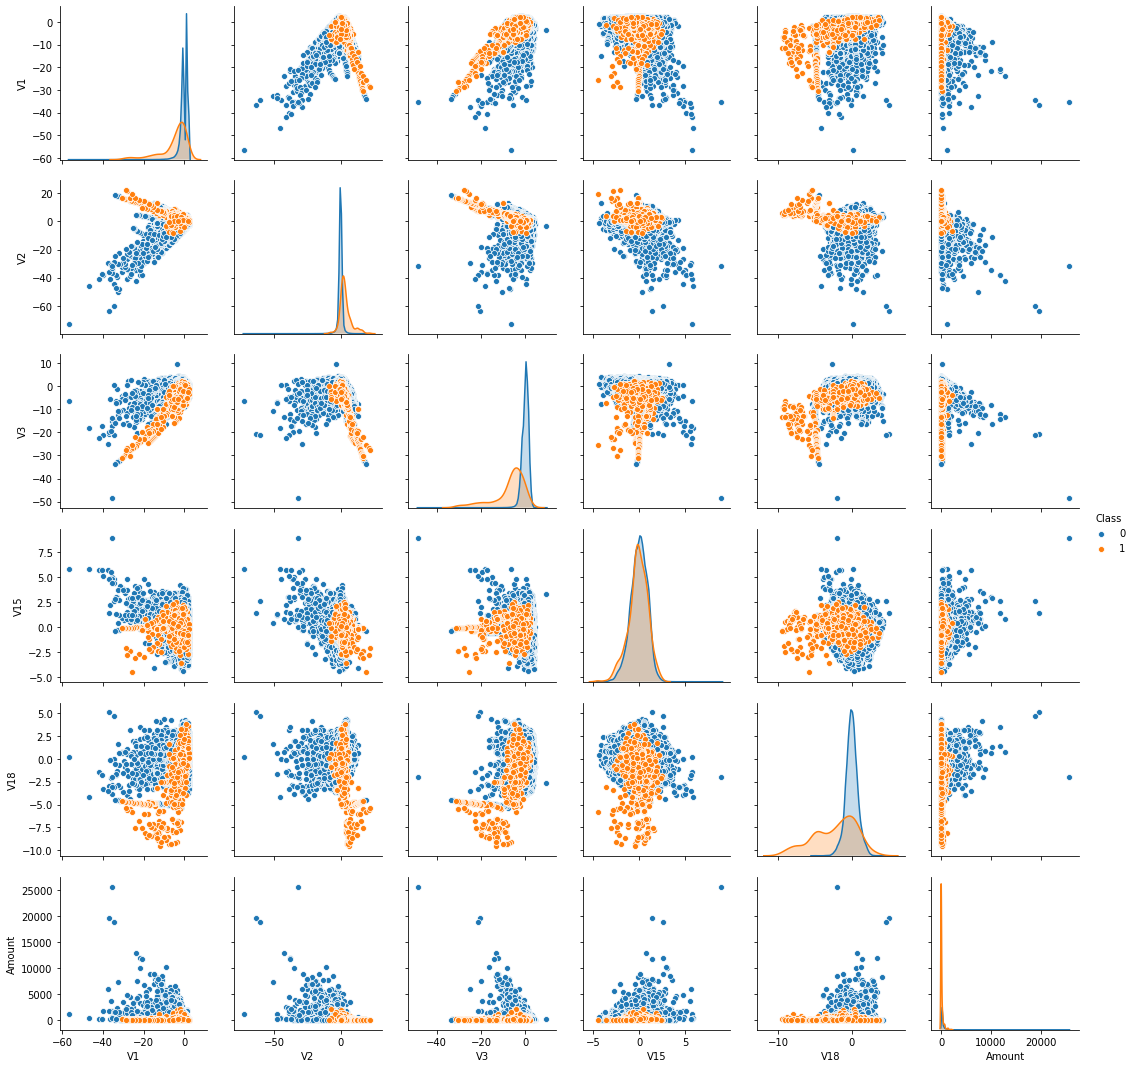

In [73]:
# To see the actual distribution of data 
sns.pairplot(data, hue = 'Class', vars = ['V1', 'V2', 'V3', 'V15', 'V18','Amount'] )

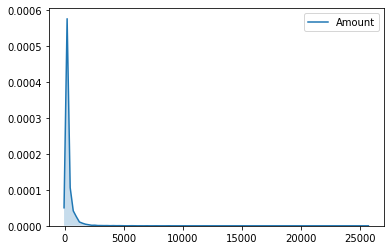

In [74]:
sns.kdeplot(data['Amount'],shade=True)

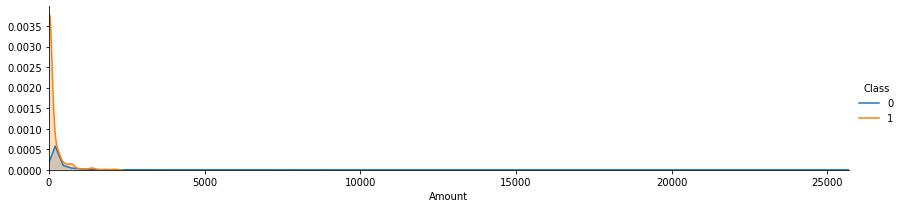

In [75]:
# To see the the actual distribution of Amount

fig=sns.FacetGrid(data,hue='Class',aspect=4)
fig.map(sns.kdeplot,'Amount',shade=True)
oldest=data['Amount'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()


In [76]:
sns.scatterplot(x = 'Amount', y = 'V1',hue='Class',  data = data)

#As the number of fraudulent transactions are very less in comparison to normal transactions we are not able to see fraudulent transactions.

Error in callback <function flush_figures at 0x140b91400> (for post_execute):


KeyboardInterrupt: 

In [77]:
dataset2 = data.drop(columns = ['Class'])

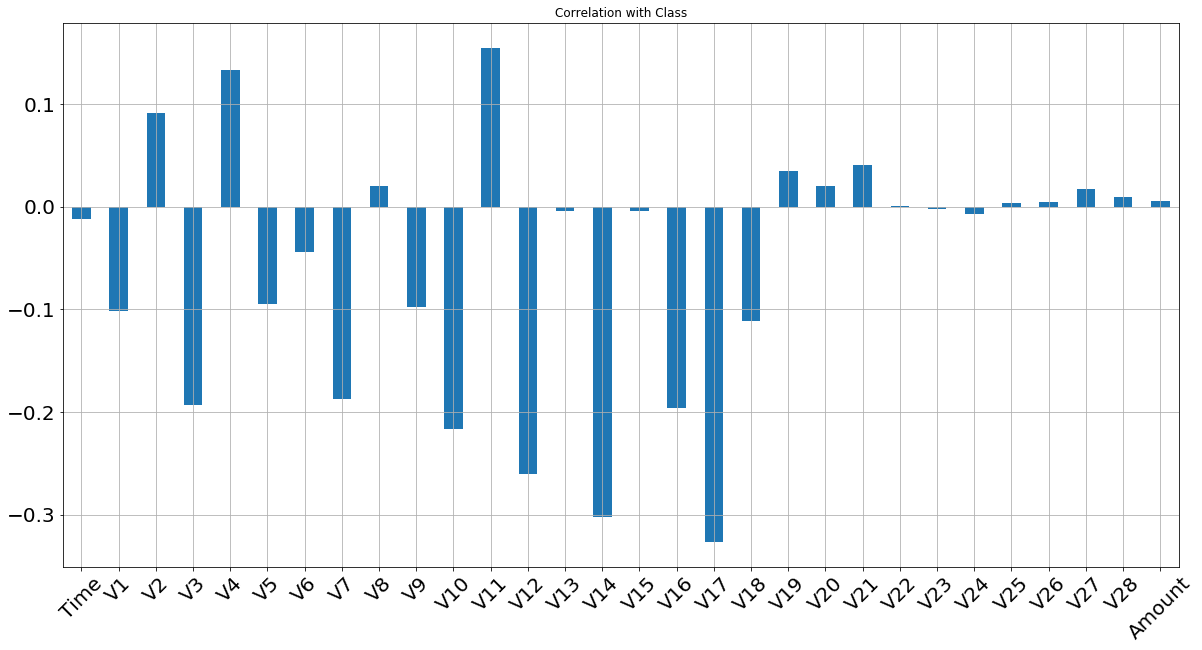

In [78]:
#Finding Correlation with target variable
dataset2.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class", fontsize = 20,
        rot = 45, grid = True)

In [79]:
#Preprocessing
#As all the features from V1 to V28 are already normalized, so we just have to normalize the Amount

data['normalized_amount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
# Dropping the actual Amount column from the dataset.
data=data.drop(['Amount'],axis=1)
# To check the dataset for changed column
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [80]:
# I think Time is the irrelevant column so we are dropping the Time column from dataset.
data=data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [81]:
# Assigning X and Y 
X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,data.columns=='Class']
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [82]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [21]:
#Splitting data into Train and Test set
#I am splitting the data into 70% of the data into training set and 30% of the data into test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train.shape

(199364, 29)

In [22]:
X_test.shape

(85443, 29)

In [23]:
# As we have to supply the X test,X_Train,ytest,y_train into deep learning models so we have to convert it into numpy arrays.
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

Deep Neural Network
Model Definition:

I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

The first is the sequential layer. It takes 16 units it is a Positive integer, it specifies dimensionality of the output space and the activation function used in this layer is relu

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network. 'sigmoid' The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

In second layer I have used 24 units and used activation function relu.

Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting. As the dataset is large I have opted for 0.5 dropout.

In third layer I have used 20 units and used activation function relu.

In fourth layer I have used 24 units and used activation function relu.

In last layer output should be 1 so i have used 1 and used activation function sigmoid.

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense

In [24]:
model = Sequential([
     #First Layer
     Dense(units=16, input_dim=29, activation='relu'),
      #Second Layer
     Dense(units=24,activation='relu'),
     Dropout(0.5),
      #Third Layer
     Dense(20,activation='relu'),
     #Fourth Layer
     Dense(24,activation='relu'),
     #Fifth Layer
     Dense(1,activation='sigmoid')  
    
    
])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)      

Setting Optimizer and Loss Function
Once our layers are added to the model, we need to set up a score function, a loss function and an optimisation algorithm.

Loss Function : We define the loss function to measure how poorly our model performs on images with known labels. It is the error rate between the oberved labels and the predicted ones. We use a specific form for categorical classifications (=2 classes) called the binary_crossentropy".

The most important function is the optimizer. This function will iteratively improve parameters (filters kernel values, weights and bias of neurons ...) in order to minimise the loss.

I choosed Adam optimizer because it combines the advantages of two other extensions of stochastic gradient descent. Specifically:

1. Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).

2. Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

Adam realizes the benefits of both AdaGrad and RMSProp.

Adam is a popular algorithm in the field of deep learning because it achieves good results fast.

The metric function "accuracy" is used is to evaluate the performance our model. This metric function is similar to the loss function, except that the results from the metric evaluation are not used when training the model (only for evaluation).

I have used 5 epochs and batch size of 15

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=15, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
199364/199364 [==============================] - 53s 264us/step - loss: 0.0096 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 50s 250us/step - loss: 0.0040 - acc: 0.9994
Epoch 3/5
199364/199364 [==============================] - 50s 250us/step - loss: 0.0036 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 48s 240us/step - loss: 0.0035 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 48s 241us/step - loss: 0.0033 - acc: 0.9994


In [26]:
score=model.evaluate(X_test,y_test)
print(score)

85443/85443 [==============================] - 3s 33us/step
[0.004434369161594629, 0.9993797034280163]


In [27]:
y_pred=model.predict(X_test)
y_test=pd.DataFrame(y_test)

Confusion matrix, without normalization
[[85282    14]
 [   39   108]]


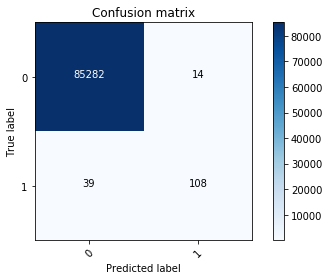

In [28]:
#Confusion Matrix
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[284261     54]
 [   131    361]]


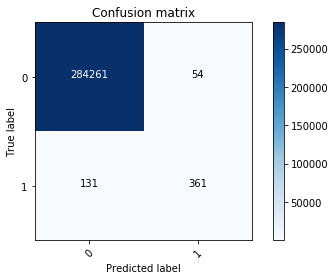

In [29]:
#Our goal is to reduce the false negative to bare minimum as it indicates number of fraudulent transaction which model predicted as normal transaction which is a very serious error because our model is not able to identify the fraudulent transactions.

#Plotting Confusion matrix for entire dataset
y_pred=model.predict(X)
y_test=pd.DataFrame(y)
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [33]:
#Our model not able to identify all the fraudulent transactions for entire dataset also as number of fals negative is 122

#Applying random Forest Classifier
X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,data.columns=='Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [31]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Confusion matrix, without normalization
[[85289     7]
 [   35   112]]


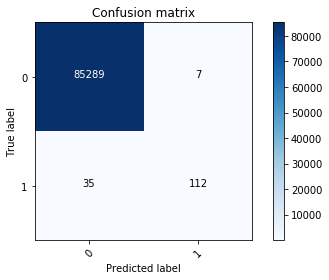

In [32]:
y_pred=random_forest.predict(X_test)
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

There is a significant improvement in reducing down the false negatives to 35 but still we have to reduce this number to bare minimum.

Confusion Matrix for Entire dataset

In [34]:
y_pred=random_forest.predict(X)

Confusion matrix, without normalization
[[284308      7]
 [    35    457]]


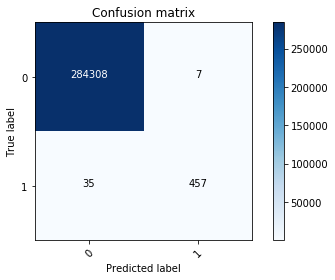

In [35]:
cnf_matrix=confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [36]:
#For the entire dataset the false negative reduced to 35 in comparison to deep learning model having false negatives 122 in case of entire dataset. Still there is a chance of further improvement.

#Applying Decision Tree Classifier
X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,data.columns=='Class']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [38]:
from sklearn.tree import DecisionTreeClassifier
decc=DecisionTreeClassifier()
decc.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
 y_pred=decc.predict(X_test)
decc.score(X_test,y_test)


0.9992275552122467

Confusion matrix, without normalization
[[85266    30]
 [   36   111]]


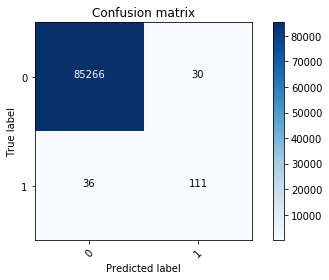

In [40]:
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[284285     30]
 [    36    456]]


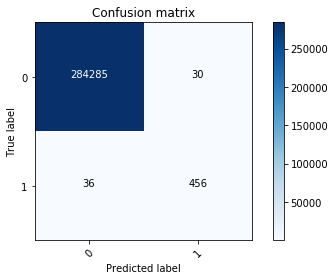

In [41]:
#Confusion Matrix for Entire dataset
y_pred=decc.predict(X)

cnf_matrix=confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

Still there is a significantly more number of false negatives so we have to apply undersampling and oversampling techniques to see that the performance of the model will improve or not.

What is the Class Imbalance Problem?
It is the problem in machine learning where the total number of a class of data (positive) is far less than the total number of another class of data (negative). This problem is extremely common in practice and can be observed in various disciplines including fraud detection, anomaly detection, medical diagnosis, oil spillage detection, facial recognition, etc.

Why is it a problem?
Most machine learning algorithms and works best when the number of instances of each classes are roughly equal. When the number of instances of one class far exceeds the other, problems arise. This is best illustrated below with an example.

Given a dataset of transaction data, we would like to find out which are fraudulent and which are genuine ones. Now, it is highly cost to the e-commerce company if a fraudulent transaction goes through as this impacts our customers trust in us, and costs us money. So we want to catch as many fraudulent transactions as possible.

If there is a dataset consisting of 10000 genuine and 10 fraudulent transactions, the classifier will tend to classify fraudulent transactions as genuine transactions. The reason can be easily explained by the numbers. Suppose the machine learning algorithm has two possibly outputs as follows:

Model 1 classified 7 out of 10 fraudulent transactions as genuine transactions and 10 out of 10000 genuine transactions as fraudulent transactions. Model 2 classified 2 out of 10 fraudulent transactions as genuine transactions and 100 out of 10000 genuine transactions as fraudulent transactions. If the classifier’s performance is determined by the number of mistakes, then clearly Model 1 is better as it makes only a total of 17 mistakes while Model 2 made 102 mistakes. However, as we want to minimize the number of fraudulent transactions happening, we should pick Model 2 instead which only made 2 mistakes classifying the fraudulent transactions. Of course, this could come at the expense of more genuine transactions being classified as fraudulent transactions, but will be a cost we can bear for now. Anyhow, a general machine learning algorithm will just pick Model 1 than Model 2, which is a problem. In practice, this means we will let a lot of fraudulent transactions go through although we could have stopped them by using Model 2. This translates to unhappy customers and money lost for the company.

**How to tell the machine learning algorithm which is the better solution? To tell the machine learning algorithm (or the researcher) that Model 2 is better than Model 1, we need to show that Model 2 above is better than Model 1 above. For that, we will need better metrics than just counting the number of mistakes made.

We introduce the concept of True Positive, True Negative, False Positive and False Negative:

True Positive (TP) – An example that is positive and is classified correctly as positive
True Negative (TN) – An example that is negative and is classified correctly as negative
False Positive (FP) – An example that is negative but is classified wrongly as positive
False Negative (FN) – An example that is positive but is classified wrongly as negative
Sampling based approaches This can be roughly classified into two categories:

## Oversampling, by adding more of the minority class so it has more effect on the machine learning algorithm 
## Undersampling, by removing some of the majority class so it has less effect on the machine learning algorithm

1. Undersampling : By undersampling, we could risk removing some of the majority class instances which is more representative, thus discarding useful information. This can be illustrated as follows: 

Here the green line is the ideal decision boundary we would like to have, and blue is the actual result. On the left side is the result of just applying a general machine learning algorithm without using undersampling. On the right, we undersampled the negative class but removed some informative negative class, and caused the blue decision boundary to be slanted, causing some negative class to be classified as positive class wrongly.

Applying Undersampling

In [95]:
fraud_indices=np.array(data[data.Class==1].index)
no_records_fraud=len(fraud_indices)
print(no_records_fraud)

492


In [96]:
normal_indices=data[data.Class==0].index
random_normal_indices=np.random.choice(normal_indices,no_records_fraud,replace=False)
random_normal_indices=np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [97]:
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))


984


In [98]:
under_sample_data=data.iloc[under_sample_indices,:]
under_sample_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231


In [120]:
X_undersample=under_sample_data.iloc[:,under_sample_data.columns!='Class']
y_undersample=under_sample_data.iloc[:,under_sample_data.columns=='Class']
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.06, random_state=0)
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [121]:
#Applying Keras Sequential model on undersampled dataset
model = Sequential([
     Dense(units=16, input_dim=29, activation='relu'),
     Dense(units=24,activation='relu'),
     Dropout(0.5),
     Dense(20,activation='relu'),
     Dense(24,activation='relu'),
     Dense(1,activation='sigmoid')  
    
    
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_17 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_19 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
#model.fit(X_train,y_train, batch_size=15, epochs=5)
model.fit(X_train,y_train, batch_size=15, epochs=10)

Epoch 1/5
924/924 [==============================] - 3s 3ms/step - loss: 0.5596 - acc: 0.6472
Epoch 2/5
924/924 [==============================] - 0s 317us/step - loss: 0.4040 - acc: 0.8712
Epoch 3/5
924/924 [==============================] - 0s 274us/step - loss: 0.3258 - acc: 0.8961
Epoch 4/5
924/924 [==============================] - 0s 286us/step - loss: 0.2644 - acc: 0.9134
Epoch 5/5
924/924 [==============================] - 0s 304us/step - loss: 0.2204 - acc: 0.9264


In [123]:
y_pred=model.predict(X_test)
y_expected=pd.DataFrame(y_test)

Confusion matrix, without normalization
[[28  0]
 [ 3 29]]


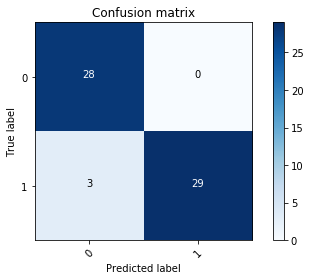

In [124]:
cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[278569   5746]
 [    51    441]]


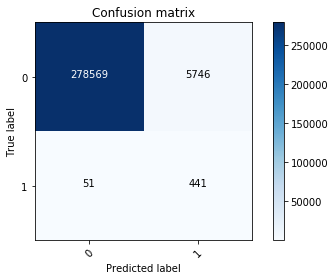

In [125]:
#Confusion Matrix for Entire dataset
y_pred=model.predict(X)

cnf_matrix=confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

Synthetic Minority Over-sampling Technique (SMOTE)
Using a machine learning algorithm out of the box is problematic when one class in the training set dominates the other. SMOTE solves this problem. In this tutorial I'll walk you through how SMOTE works and then how the SMOTE function code works. 

This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases.

The new instances are not just copies of existing minority cases; instead, the algorithm takes samples of the feature space for each target class and its nearest neighbors, and generates new examples that combine features of the target case with features of its neighbors. This approach increases the features available to each class and makes the samples more general.

SMOTE takes the entire dataset as an input, but it increases the percentage of only the minority cases. For example, suppose you have an imbalanced dataset where just 1% of the cases have the target value A (the minority class), and 99% of the cases have the value B. To increase the percentage of minority cases to twice the previous percentage, you would enter 200 for SMOTE percentage in the module's properties.

In [126]:
X_resample,y_resample=SMOTE().fit_sample(X,y.values.ravel())
y_resample=pd.DataFrame(y_resample)
X_resample=pd.DataFrame(X_resample)
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state=0)
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [127]:
#Applying Keras Sequential Model on Oversampled dataset
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=15, epochs=5)

Epoch 1/5
398041/398041 [==============================] - 110s 276us/step - loss: 0.0426 - acc: 0.9848
Epoch 2/5
398041/398041 [==============================] - 106s 268us/step - loss: 0.0195 - acc: 0.9944
Epoch 3/5
398041/398041 [==============================] - 106s 266us/step - loss: 0.0150 - acc: 0.9960
Epoch 4/5
398041/398041 [==============================] - 106s 267us/step - loss: 0.0131 - acc: 0.9966
Epoch 5/5
398041/398041 [==============================] - 104s 261us/step - loss: 0.0115 - acc: 0.9971


Confusion matrix, without normalization
[[84847   325]
 [   31 85386]]


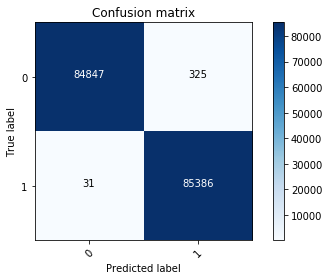

In [56]:
#Confusion Matrix for test set
y_pred=model.predict(X_test)
y_expected=pd.DataFrame(y_test)

cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[283315   1000]
 [     1    491]]


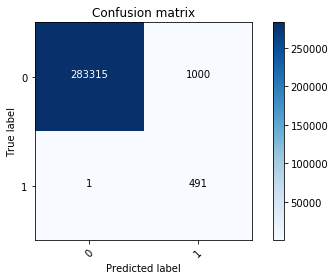

In [57]:
#Confusion Matrix for entire dataset
y_pred=model.predict(X)

cnf_matrix=confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

Conclusion
Since, our goal was to reduce the false negatives which we have reduced significantly to 2 using SMOTE oversampling technique.Further we can also increase the epochs and can try above applied machine learning algo to improve the result and reduce the false negative to zero.

In [58]:
# Lets try split on test and train first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train.shape


(199364, 29)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)

In [84]:
X_train.shape

(256326, 29)

In [85]:
y_train.shape

(256326, 1)

In [86]:
#resampling only train
X_resample,y_resample=SMOTE().fit_sample(X_train,y_train.values.ravel())

y_train=pd.DataFrame(y_resample)
X_train=pd.DataFrame(X_resample)

In [87]:
X_train.shape

(511778, 29)

In [88]:
y_train.shape

(511778, 1)

In [64]:
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [92]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=25, epochs=10)

Epoch 1/10
511778/511778 [==============================] - 85s 167us/step - loss: 0.0065 - acc: 0.9986
Epoch 2/10
511778/511778 [==============================] - 78s 153us/step - loss: 0.0060 - acc: 0.9987
Epoch 3/10
511778/511778 [==============================] - 76s 148us/step - loss: 0.0059 - acc: 0.9987
Epoch 4/10
511778/511778 [==============================] - 80s 156us/step - loss: 0.0058 - acc: 0.9987
Epoch 5/10
511778/511778 [==============================] - 82s 160us/step - loss: 0.0056 - acc: 0.9988
Epoch 6/10
511778/511778 [==============================] - 80s 156us/step - loss: 0.0058 - acc: 0.9988
Epoch 7/10
511778/511778 [==============================] - 81s 158us/step - loss: 0.0055 - acc: 0.9988
Epoch 8/10
511778/511778 [==============================] - 79s 154us/step - loss: 0.0054 - acc: 0.9989
Epoch 9/10
511778/511778 [==============================] - 78s 152us/step - loss: 0.0055 - acc: 0.9989
Epoch 10/10
511778/511778 [==============================] - 78s

Confusion matrix, without normalization
[[28382    44]
 [    9    46]]


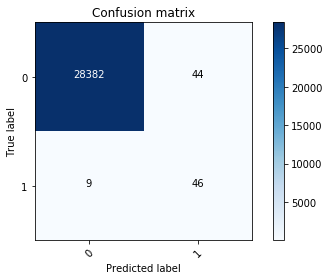

In [93]:
#Confusion Matrix for test
y_pred=model.predict(X_test)
y_expected=pd.DataFrame(y_test)

cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[283980    335]
 [     9    483]]


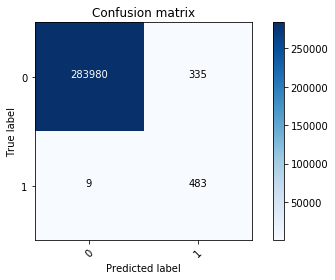

In [94]:
#Confusion Matrix for entire dataset
y_pred=model.predict(X)

cnf_matrix=confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [ ]:
'''Confusion matrix, without normalization 20 batch, 5 epochs
[[283883    432]
 [     9    483]]'''